In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
traits = pd.read_csv('traitdata.csv')
env = pd.read_csv('data.csv')

In [3]:
# adjustments (m, f) = (1,0) | gravid (y, n, n/a) = (1, 0, -1) | morph(y, o, w) = (2, 1, 0)
# toe (N/A = 0)

In [4]:
np.shape(traits)

(242, 20)

In [5]:
gravid = traits["gravid"]

In [6]:
new_gravid_vector = []
for x in gravid:
    if x == 'y':
        new_gravid_vector.append(1)
    elif x == 'n':
        new_gravid_vector.append(0)
    else:
        new_gravid_vector.append(-1)

In [7]:
gravid = traits["morph"]

In [8]:
new_morph_vector = []
for x in gravid:
    if x == 'y':
        new_morph_vector.append(2)
    elif x == 'o':
        new_morph_vector.append(1)
    else:
        new_morph_vector.append(0)

In [9]:
variables = []
for i in traits:
    variables.append(i)

In [10]:
print(variables)

['sex', 'gravid', 'morph', 'capture_temp', 'substrate_temp', 'scars', 'ticks', 'mites', 'mass', 'svl', 'head_length', 'head_width', 'head_depth', 'bicep_length', 'forearm_length', 'hand_finger_length', 'femur_length', 'tibia_length', 'toe', 'autotomy']


In [11]:
A = []
for x in variables:
    current_vec = traits[x]
    y = current_vec.values
    if x == 'gravid':
        A.append(np.array(new_gravid_vector))
    elif x == 'morph':
        A.append(np.array(new_morph_vector))
    else:
        A.append(np.array(y))

In [12]:
from sklearn.decomposition import PCA

In [13]:
B = np.array(A)

In [14]:
pca = PCA(n_components=2)

In [15]:
C = pca.fit(B)

In [16]:
print(C)

PCA(n_components=2)


In [17]:
pca.singular_values_

array([1053.8868312 ,  880.01369924])

In [18]:
 variance = pca.explained_variance_ratio_

In [20]:
cum_sum = 0
for x in variance:
    cum_sum += x
    print(cum_sum)

0.5803820724844618
0.985055696883648


In [33]:
def PCA_train(training_set, n_components):
    U, s, Vt = np.linalg.svd(training_set)
    basis_components = Vt[:n_components].T
    return basis_components

In [34]:
def PCA_project(data, principal_components):
    """ Project the data set into the new basis vectors Parameters:
        data: data to project (MxN)
        principal_components: Our k principal components as column vectors
    Returns:
        Data projected onto new_basis (MxK)
    """
    # YOUR CODE HERE
    proj = np.dot(data, principal_components) 
    return proj

In [48]:
two_basis = PCA_train(B.T, 2)

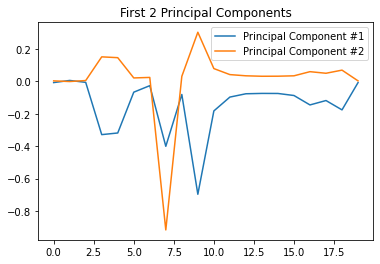

In [49]:
plt.figure()
for i, comp in enumerate(two_basis.T):
    plt.plot(comp, label=f"Principal Component #{i+1}") 
    plt.title("First 2 Principal Components")
    plt.legend()

In [37]:
colors = ['#0000ff', '#00ff00']

In [50]:
print(B.T.shape)

(242, 20)


In [51]:
two_projected = PCA_project(B.T, two_basis)

In [59]:
two_projected.shape

(242, 2)

In [60]:
two_projected.sort()

In [61]:
print(two_projected)

[[-7.95920536e+01  1.83860335e+01]
 [-7.03671886e+01  3.08077908e+01]
 [-7.38393855e+01  3.24150605e+01]
 [-7.21992983e+01  3.13958014e+01]
 [-6.66608678e+01  2.90392797e+01]
 [-7.85833016e+01  1.35402465e+01]
 [-7.40985618e+01  3.23354415e+01]
 [-7.75421902e+01  3.38672050e+01]
 [-7.09478023e+01  3.08165922e+01]
 [-7.22748877e+01  3.15576469e+01]
 [-7.31850853e+01  3.18254577e+01]
 [-7.40024584e+01  3.22421688e+01]
 [-7.34161217e+01  3.19807376e+01]
 [-7.35520493e+01  3.20885083e+01]
 [-7.54593136e+01  3.30636639e+01]
 [-8.13152204e+01  2.24609095e+01]
 [-7.86097754e+01  3.43527018e+01]
 [-7.00188199e+01  3.05103777e+01]
 [-7.52702796e+01  3.30364359e+01]
 [-7.16673234e+01  3.16204384e+01]
 [-7.92660627e+01  3.47341328e+01]
 [-7.80097143e+01  3.42091424e+01]
 [-7.02948938e+01  3.05968839e+01]
 [-8.74699892e+01  1.86541115e+01]
 [-7.30409863e+01  3.19924636e+01]
 [-8.21426427e+01  2.50056088e+01]
 [-7.53384126e+01  3.29126137e+01]
 [-9.70053411e+01 -2.64561306e+01]
 [-6.71057328e+01  2

Text(0, 0.5, 'Projection onto 2nd Principal Component')

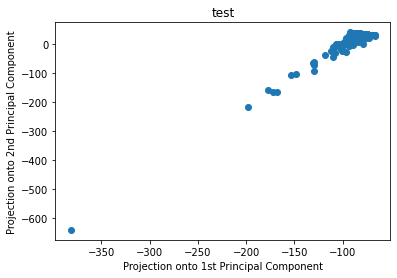

In [58]:
plt.figure()
plt.scatter(*two_projected.T) 
plt.title("test") 
plt.xlabel('Projection onto 1st Principal Component') 
plt.ylabel('Projection onto 2nd Principal Component')